# Project 1

# Used Vehicle Price Prediction

#### Jeimmy Rocio Espinel - Codigo: 201628049
#### Ferney Rincon - Codigo:201728024
#### Rodrigo Amortegui - Codigo:199827026

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [28]:
%matplotlib inline
import pandas as pd

Importamos  información Train

In [29]:
data = pd.read_csv('https://github.com/fermarin/MachineLearningClass/raw/master/dataTrain_carListings.zip')

In [30]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


Importamos información de Test

In [31]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [32]:
data_test.shape

(250000, 5)

### Submission example

Validamos si tenemos missing values

In [33]:
import numpy as np

In [34]:
for col in data.columns:
    print('Valores NA:',col,'=',pd.isna(data[col]).values.ravel().sum())

Valores NA: Price = 0
Valores NA: Year = 0
Valores NA: Mileage = 0
Valores NA: State = 0
Valores NA: Make = 0
Valores NA: Model = 0


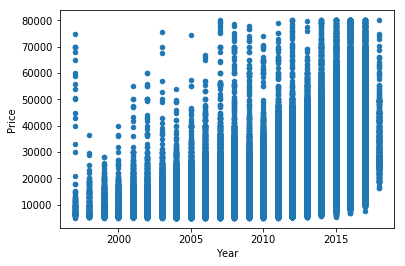

In [35]:
data.plot(kind='scatter', y='Price', x='Year')

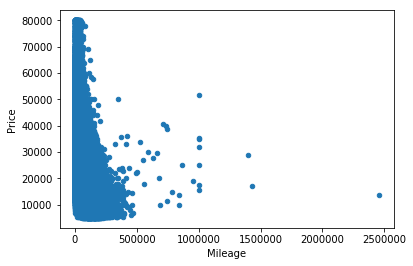

In [36]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [ ]:
Se definen X y Y, sin tener en cuenta la variable State, ya que según juicio de expertos y validación, esta no es de importancia para el modelo.



In [41]:
X = data[['Year', 'Mileage', 'Make', 'Model']]
Y = data.Price

In [42]:
X = pd.get_dummies(data=X)

In [43]:
X.head()

,Year,Mileage,Make_Acura,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,2014,31909.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,25741.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,24633.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,84026.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,22816.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Partimos nuestra base de datos en train y test

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.30, random_state=42)


Entrenamos el modelo en la parte inferior mostramos como encontramos los mejores parámetros

In [47]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_jobs=-1,n_estimators=50, max_depth=450)
regr

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=450,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
regr.fit(X,Y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=450,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Realizamos la predicción con nuestra data de test

In [49]:
predicted = regr.predict(X_test)

In [51]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print('RMSE:')
print(rmse)


RMSE:
1603.4947012771772


In [52]:
X2 = data_test[['Year', 'Mileage', 'Make', 'Model']]

In [53]:
X2 = pd.get_dummies(data=X2)

Tunning

In [21]:
from sklearn.model_selection import cross_val_score
estimator_range = range(10,400,50)
RMSE_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1,oob_score=True,max_depth=10)
    MSE_scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=14, scoring='neg_mean_squared_error')
    
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    


In [22]:
pd.DataFrame(RMSE_scores)

,0
0,8337.411028
1,8337.269435
2,8336.696667
3,8336.214977
4,8336.211705
5,8336.156351
6,8335.873188
7,8335.617959
8,8335.673056
9,8335.409258


In [ ]:
max_depth_range = range(200, 566)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, Y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))